In [10]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv("../data/Integration_b.csv",encoding="utf-8")
data.dropna(inplace=True)

# Define the target variable and features
X = data.drop(columns=['Date','Total Traffic Volume']).dropna()
X = X.select_dtypes(include=['number'])
y = data['Total Traffic Volume'].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SelectKBest to select the top features
selector = SelectKBest(score_func=f_regression, k=8)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Fit ExtraTreesClassifier on the selected features
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

# Print the selected features and their importance
selected_features = X.columns[selector.get_support()]
feature_importances = model.feature_importances_

# Display the selected features and their importances
selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})


selected_features_df

,Feature,Importance
0,Exchange Rate,0.141770
1,Gross Domestic Product (GDP),0.012452
2,Export growth rate,0.140525
3,Import growth rate,0.140916
4,Nationwide Consumer Price Index,0.139428
5,Regular Unleaded Gasoline,0.141142
6,Diesel Fuel for Automobiles,0.141710
7,number of car ownership,0.142057


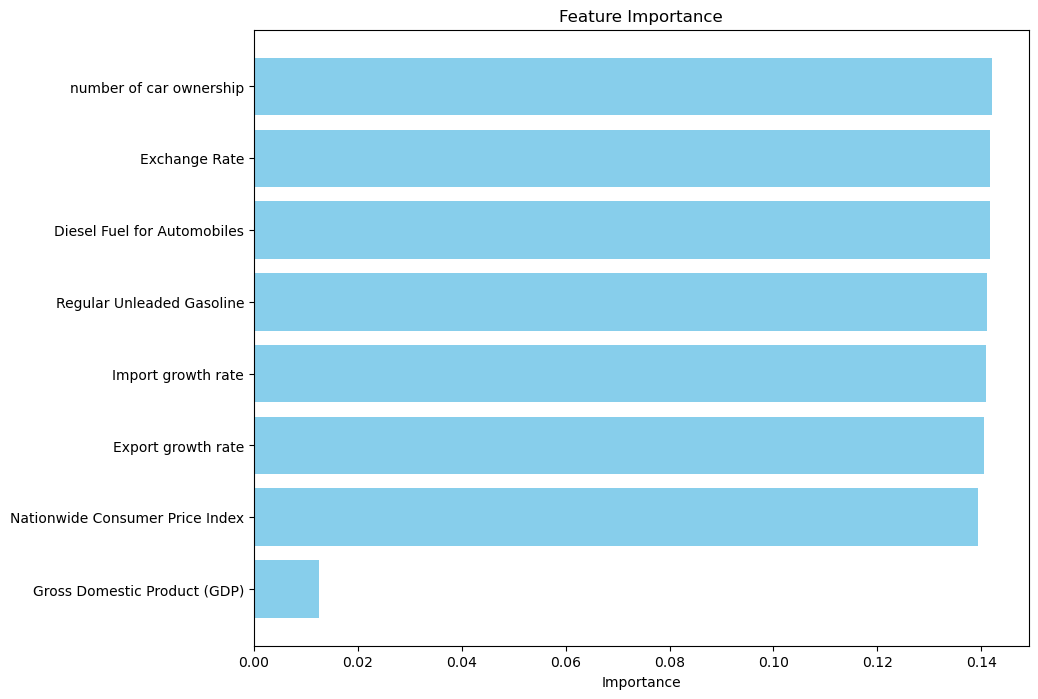

In [11]:
# Barh plot으로 시각화
selected_features_df.sort_values('Importance', inplace=True)
plt.figure(figsize=(10, 8))
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# GDP 가 Correlation 은 높게 나왔지만, Feature Importance
# 에서는 낮게 나왔다
# 신기